# Import Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('all_data.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
df

Review     Label
0     น่าเกลียดมาก มาก บริการเป็น bitchy bitchy ห้อง...  Negative
1     ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...  Positive
2                   ไม่ดีมากไม่สะอาดห้องขี้เกียจพนักงาน  Negative
3                     ตลาดที่ดีและใกล้กับห้างสรรพสินค้า  Positive
4     นอนหลับได้ดีเพียงแค่ต้องการเข้าไปในตรอกและรถตุ...  Negative
...                                                 ...       ...
2953           สถานที่ยุทธศาสตร์ใกล้กับ bts และช้อปปิ้ง  Positive
2954                                     ทำเลดีใกล้ bts  Positive
2955              โรงแรมสบาย ตำแหน่งที่ดีที่สุด ปลอดภัย  Positive
2956                                  บริการดีทำเลสะดวก  Positive
2957  ห้องพักของโรงแรมคับแคบผนังไม้อัดมีเสียงดังมากจ...  Negative

[2958 rows x 2 columns]

In [ ]:
df['Label'].value_counts()

Positive    2005
Negative     953
Name: Label, dtype: int64

# Creat Model for Classification

## ตัดคำ (Word Segmentation)

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.1 MB/s 


In [ ]:
pip install attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.1 MB/s 
     |████████████████████████████████| 473 kB 69.6 MB/s 
     |████████████████████████████████| 88 kB 788 kB/s 
     |████████████████████████████████| 1.0 MB 36.3 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=30ff96cefafd0a1a8ad584da5d711819d6c29ac290e6abec18d76476adc58153
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=c6547f790b352871498f56bcc966d69b553773182b7e9f8ffc51322f296d7b53
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built docopt fire


In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
def tokenize(text):
    return word_tokenize(text,engine ='attacut', keep_whitespace=False)

In [ ]:
df_tokened = df['Review'].apply(tokenize)

In [ ]:
df_tokened

0       [น่า, เกลียด, มาก, มาก, บริการ, เป็น, bitchy, ...
1       [ใกล้, ตลาด, ประตู, น้ำ, หาก, คุณ, ต้องการ, ซื...
2       [ไม่, ดี, มาก, ไม่, สะอาด, ห้อง, ขี้, เกียจ, พ...
3       [ตลาด, ที่, ดี, และ, ใกล้, กับ, ห้าง, สรรพสินค้า]
4       [นอน, หลับ, ได้, ดี, เพียง, แค่, ต้องการ, เข้า...
                              ...                        
2953    [สถานที่, ยุทธศาสตร์, ใกล้, กับ, bts, และ, ช้อ...
2954                                [ทำเล, ดี, ใกล้, bts]
2955    [โรงแรม, สบาย, ตำแหน่ง, ที่, ดี, ที่สุด, ปลอด,...
2956                            [บริการ, ดี, ทำเล, สะดวก]
2957    [ห้อง, พัก, ของ, โรง, แรม, คับแคบ, ผนัง, ไม้, ...
Name: Review, Length: 2958, dtype: object

In [ ]:
for i in range(10):
    print(df_tokened[i])

['น่า', 'เกลียด', 'มาก', 'มาก', 'บริการ', 'เป็น', 'bitchy', 'bitchy', 'ห้อง', 'ส่ง', 'กลิ่น', 'มี', 'แมลง', 'อยู่', 'ลูก', 'พี่ลูกน้อง', 'มี', 'โรค', 'หัวใจ', 'จนกระทั่ง', 'หายใจ', 'ถี่', 'ขอ', 'ให้', 'ย้าย', 'ไป', 'คืน', 'ที่', 'สอง', 'ก็', 'ไม่', 'ได้', 'รับ', 'แม้ว่า', 'จอง', 'คืน', 'เหตุผล', 'เต็ม', 'แม้', 'ว่า', 'จะ', 'ว่างเปล่า', 'แต่', 'หลาย', 'คน', 'เพิ่ง', 'จอง', 'ทารุณ ซาดิสม์', 'ไม่', 'มี', 'trolly', 'อยู่', 'ไม่', 'มี', 'พนักงาน', 'ยก', 'กระเป๋า', 'ที่', 'ยก', 'มัน', 'ขึ้น', 'มา', 'เตรียม', 'ตัว', 'ให้', 'พร้อม', 'ช้อปปิ้ง', 'มากมาย', 'เตรียม', 'พร้อม', 'ที่', 'จะ', 'นำ', 'ยก', 'ตัว', 'เอง', 'เมื่อ', 'อยู่', 'ที่', 'นี่', 'ไม่', 'มี', 'ครั้ง', 'อยู่', 'ที่', 'นี่', 'นุ่น', 'ของ', 'ต้นนุ่น', 'ไม่', 'แนะนำ', 'จริง']
['ใกล้', 'ตลาด', 'ประตู', 'น้ำ', 'หาก', 'คุณ', 'ต้องการ', 'ซื้อ', 'สินค้า', 'ใน', 'ตลาด', 'pretunam', 'เพียง', 'แค่', 'เดิน', 'นี่', 'เป็น', 'ครั้ง', 'ที่', 'สอง', 'ที่', 'เรา', 'มา', 'อยู่', 'ที่', 'นี่']
['ไม่', 'ดี', 'มาก', 'ไม่', 'สะอาด', 'ห้อง', 'ขี้', 'เกียจ

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.corpus import thai_stopwords

In [ ]:
# Thai Stop Words
TH__stop = list(thai_stopwords())

In [ ]:
TfidfVectorizer(stop_words = TH__stop, ngram_range=(1, 2), lowercase=True, max_features=150000)

TfidfVectorizer(max_features=150000, ngram_range=(1, 2),
                stop_words=['ครั้งหลังสุด', 'น่า', 'น่ะ', 'เป็นๆ', 'ทั้งปวง',
                            'นิดหน่อย', 'อันที่จะ', 'ตามที่', 'นั้น', 'จนกว่า',
                            'กว่า', 'จัดตั้ง', 'วันนั้น', 'ตั้งแต่', 'ต้อง',
                            'เป็นเพราะว่า', 'อย่างนี้', 'อย่าง', 'พวกที่',
                            'ถ้าจะ', 'เสียยิ่งนัก', 'ใดๆ', 'เป็นที่', 'ที่แท้',
                            'เสียจนกระทั่ง', 'อยู่', 'จวบ', 'ง่ายๆ', 'ต่างๆ',
                            'ความ', ...])

In [ ]:
def identity_fun(text):
    return text

tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_fun, #does no extra tokenizing
                                   preprocessor=identity_fun, #no extra preprocessor
                                   token_pattern=None)

In [ ]:
tfidf_vector= tfidf_vectorizer.fit_transform(df_tokened)
features = tfidf_vectorizer.get_feature_names()
tfidf_array = np.array(tfidf_vector.todense())

df_features = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names())
df_features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


a  abang  abf   ac  accor   ai  aircond  airport  airportlink  aja  \
0     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
3     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
4     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
...   ...    ...  ...  ...    ...  ...      ...      ...          ...  ...   
2953  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2954  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2955  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2956  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2957  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   

      ...  ไหล  ไหว  ไหว้   ไอ  ไอ้  ไฮเทคโนโลยี    •  •อิสระ    ️  ️มี  
0     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
3     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
4     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
...   ...  ...  ...   ...  ...  ...          ...  ...     ...  ...  ...  
2953  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2954  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2955  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2956  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2957  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  

[2958 rows x 3843 columns]

In [ ]:
tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Random OverSampling

In [ ]:
from collections import Counter

In [ ]:
#Over
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(tfidf_array, df['Label'])
# summarize class distribution
print(Counter(y_over))

Counter({'Negative': 2005, 'Positive': 2005})


In [ ]:
y_over

0       Negative
1       Positive
2       Negative
3       Positive
4       Negative
          ...   
4005    Negative
4006    Negative
4007    Negative
4008    Negative
4009    Negative
Name: Label, Length: 4010, dtype: object

In [ ]:
len(X_over)

4010

## Model

In [ ]:
from sklearn.model_selection import train_test_split
X = X_over
ground_truth = y_over
X_train, X_test, y_train, y_test = train_test_split(X, ground_truth, test_size=0.3, random_state=101)

In [ ]:
y_test.value_counts()

Negative    613
Positive    590
Name: Label, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97       613
    Positive       0.98      0.96      0.97       590

    accuracy                           0.97      1203
   macro avg       0.97      0.97      0.97      1203
weighted avg       0.97      0.97      0.97      1203



In [ ]:
y_test.value_counts()

Negative    613
Positive    590
Name: Label, dtype: int64

# Confusion Matrix

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conf Matrix
from matplotlib import pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)

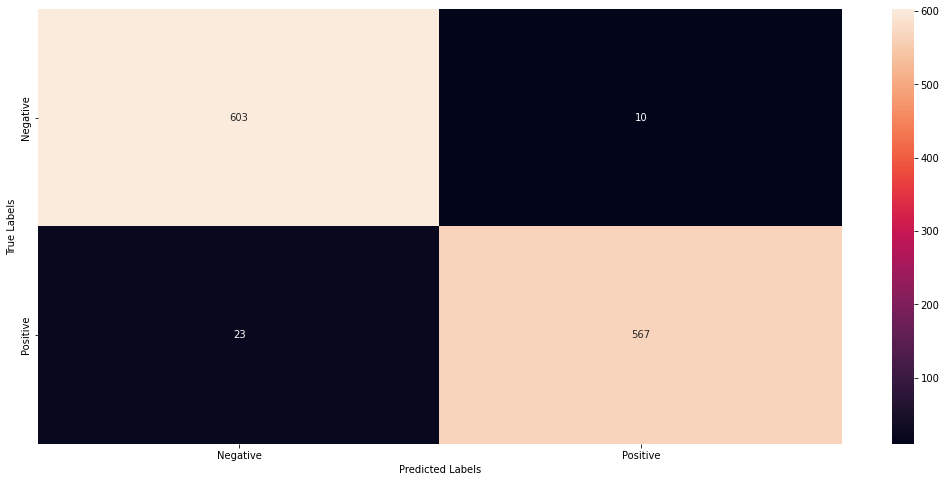

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(cf_matrix, annot = True,fmt='g', xticklabels = ('Negative','Positive'), yticklabels = ('Negative','Positive'))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Implement with Unseen Data**

## Import

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_unseen = pd.read_csv('preprocessed_unseen_data.csv').drop(['Unnamed: 0', 'Rating'],axis=1)

In [ ]:
df_unseen

Review_split
0     มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...
1     บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...
2     การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...
3     ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...
4     ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...
...                                                 ...
1168  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...
1169  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...
1170  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...
1171                                       ห้องพักสะอาด
1172                               อีก เดือนเจอกันนะค่ะ

[1173 rows x 1 columns]

In [ ]:
df_unseen = df_unseen.rename(columns={'Review_split':'Review'})
df_unseen

Review
0     มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...
1     บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...
2     การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...
3     ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...
4     ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...
...                                                 ...
1168  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...
1169  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...
1170  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...
1171                                       ห้องพักสะอาด
1172                               อีก เดือนเจอกันนะค่ะ

[1173 rows x 1 columns]

ตัดอักษรเรื่อยเปื่อย

In [ ]:
import re
def remove_unvalue(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
def filter_contents(text):
    text_filtered = ''.join([i for i in text if not i.isdigit()])
    for i in ['...','..','.',"#","'","%","?","#","@","!","\xa0",'/','"',")","(","-","_",'“','”',"ๆ","'์","ฯลฯ","ฯ","&","<",">",".","+",":",'\n']:
        text_filtered = text_filtered.replace(i,"")
        text_filtered = text_filtered.replace(","," ")
    return text_filtered

In [ ]:
#df_unseen['Review'] = df_unseen['Review'].apply(filter_contents)
#df_unseen['Review'] = df_unseen['Review'].apply(remove_unvalue)

In [ ]:
df_unseen

Review
0     มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...
1     บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...
2     การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...
3     ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...
4     ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...
...                                                 ...
1168  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...
1169  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...
1170  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...
1171                                       ห้องพักสะอาด
1172                               อีก เดือนเจอกันนะค่ะ

[1173 rows x 1 columns]

## ตัดคำ

In [ ]:
df_tokened_unseen = df_unseen['Review'].apply(tokenize)

In [ ]:
df_tokened_unseen

0       [มา, พัก, เป็น, ครั้ง, ที่, แล้ว, ค่ะ, ประทับใ...
1       [บริการ, ดี, ประทับใจ, เดินทาง, สะดวก, ครับ, ใ...
2       [การ, บริการ, ดี, และ, ห้อง, สวยงาม, ห้องน้ำ, ...
3       [ทำเล, โรง, แรม, ดี, มาก, ค่ะ, ห้อง, กว้าง, ห้...
4       [ห้อง, ดี, มาก, สะอาด, ห้องน้ำ, สะอาด, แอร์, เ...
                              ...                        
1168    [จอง, ไว้, สาม, ห้อง, เพราะ, เช้า, ต้อง, มี, ไ...
1169    [ทำเล, ดี, มาก, เดิน, ขึ้น, bts, ได้, เลย, ราค...
1170    [น, ตาม, ที่, แจ้ง, ว่า, สามารถ, เช็ค, อิน, ได...
1171                                   [ห้อง, พัก, สะอาด]
1172                      [อีก, เดือน, เจอ, กัน, นะ, ค่ะ]
Name: Review, Length: 1173, dtype: object

In [ ]:
for i in range(10):
    print(df_tokened_unseen[i])

['มา', 'พัก', 'เป็น', 'ครั้ง', 'ที่', 'แล้ว', 'ค่ะ', 'ประทับใจ', 'ตั้งแต่', 'ทำเล', 'ของ', 'โรง', 'แรม', 'การ', 'บริการ', 'ห้อง', 'พัก', 'ความ', 'สะอาด']
['บริการ', 'ดี', 'ประทับใจ', 'เดินทาง', 'สะดวก', 'ครับ', 'ใกล้', 'แหล่ง', 'ของ', 'กิน', 'ใกล้', 'รถไฟฟ้า', 'มา', 'พัก', 'ครั้ง', 'แล้ว']
['การ', 'บริการ', 'ดี', 'และ', 'ห้อง', 'สวยงาม', 'ห้องน้ำ', 'สะอาด', 'มี', 'ที่', 'จอด', 'รถ', 'ใต้', 'ดิน', 'สอง', 'ชั้น']
['ทำเล', 'โรง', 'แรม', 'ดี', 'มาก', 'ค่ะ', 'ห้อง', 'กว้าง', 'ห้องน้ำ', 'ก็', 'กว้างสมราคา', 'ทาง', 'เดิน', 'ห้อง', 'อาจ', 'จะ', 'มืด', 'ไป', 'หน่อย', 'แต่', 'ภาย', 'ใน', 'ห้อง', 'สวย', 'ค่ะ', 'ไม่', 'ได้', 'แย่', 'เลย', 'พนักงาน', 'บริการ', 'ดี', 'พูดจา', 'เพราะ', 'ไม่', 'เหวี่ยง', 'ไป', 'ไหน', 'สะดวก', 'มา', 'คน', 'เดียว', 'ก็', 'ไม่', 'น่า', 'กลัว', 'ค่ะ', 'ใกล้', 'สถานที่', 'คาเฟ่', 'ร้าน', 'อาหาร', 'ต่าง', 'ติด', 'ตรง', 'เข้า', 'พัก', 'คืน', 'แรก', 'ที่', 'นอน', 'มี', 'ฝุ่น', 'นิดหน่อย', 'เหมือน', 'ไม่', 'ได้', 'ใช้', 'งาน', 'แต่', 'คืน', 'ต่อ', 'ไป', 'แม่บ้าน', 'ทำ', 'ความ'

## TF-IDF

In [ ]:
tfidf_vector_unseen = tfidf_vectorizer.fit_transform(df_tokened_unseen)
features_unseen = tfidf_vectorizer.get_feature_names()
tfidf_array_unseen = np.array(tfidf_vector_unseen.todense())

df_features_unseen = pd.DataFrame(tfidf_array_unseen,columns=tfidf_vectorizer.get_feature_names())
df_features_unseen

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


a  abloom  activates  agoda  airport  and  areas  arl  asia  bangkok  \
0     0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
1     0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
2     0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
3     0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
4     0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
...   ...     ...        ...    ...      ...  ...    ...  ...   ...      ...   
1168  0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
1169  0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
1170  0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
1171  0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   
1172  0.0     0.0        0.0    0.0      0.0  0.0    0.0  0.0   0.0      0.0   

      ...  ไอบิส  ไฮซี    …    ️  ️️️️️️️  ️️️️️️️️️  ️️️️️️️️️️️️️️️️️️️️️️  \
0     ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
1     ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
2     ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
3     ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
4     ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
...   ...    ...   ...  ...  ...      ...        ...                     ...   
1168  ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
1169  ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
1170  ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
1171  ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   
1172  ...    0.0   0.0  0.0  0.0      0.0        0.0                     0.0   

        ￼    🇨    🇳  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
1168  0.0  0.0  0.0  
1169  0.0  0.0  0.0  
1170  0.0  0.0  0.0  
1171  0.0  0.0  0.0  
1172  0.0  0.0  0.0  

[1173 rows x 2444 columns]

In [ ]:
tfidf_array_unseen

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

ปรับ จำนวน feature ของ tfidf_array_unseen ให้เท่ากับ lr model

In [ ]:
not_existing_cols = [c for c in df_features.columns.tolist() if c not in df_features_unseen]
# add this columns to the data frame
df_features_unseen = df_features_unseen.reindex(df_features_unseen.columns.tolist() + not_existing_cols, axis=1)
# new columns dont have values, replace null by 0
df_features_unseen.fillna(0, inplace = True)
# use the original X structure as mask for the new inference dataframe
df_features_unseen = df_features_unseen[df_features.columns.tolist()]

In [ ]:
df_features_unseen

a  abang  abf   ac  accor   ai  aircond  airport  airportlink  aja  \
0     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
2     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
3     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
4     0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
...   ...    ...  ...  ...    ...  ...      ...      ...          ...  ...   
1168  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1169  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1170  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1171  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   
1172  0.0    0.0  0.0  0.0    0.0  0.0      0.0      0.0          0.0  0.0   

      ...  ไหล  ไหว  ไหว้   ไอ  ไอ้  ไฮเทคโนโลยี    •  •อิสระ    ️  ️มี  
0     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
2     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
3     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
4     ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
...   ...  ...  ...   ...  ...  ...          ...  ...     ...  ...  ...  
1168  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1169  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1170  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1171  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  
1172  ...  0.0  0.0   0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  

[1173 rows x 3843 columns]

**Use with model**

In [ ]:
y_pred_unseen = lr.predict(df_features_unseen)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
new_series = pd.Series(y_pred_unseen)

In [ ]:
df_unseen = pd.concat(([df_unseen,new_series]) , axis=1)

In [ ]:
df_unseen = df_unseen.set_axis(['Review','Label'], axis=1)
df_unseen


Review     Label
0     มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...  Positive
1     บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...  Positive
2     การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...  Positive
3     ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...  Negative
4     ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...  Positive
...                                                 ...       ...
1168  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...  Negative
1169  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...  Positive
1170  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...  Negative
1171                                       ห้องพักสะอาด  Positive
1172                               อีก เดือนเจอกันนะค่ะ  Positive

[1173 rows x 2 columns]

In [ ]:
df_unseen['Label'].value_counts()

Positive    818
Negative    355
Name: Label, dtype: int64

**Merge All Data**

In [ ]:
df_all = pd.concat([df,df_unseen]).reset_index().drop('index',axis=1)
df_all

Review     Label
0     น่าเกลียดมาก มาก บริการเป็น bitchy bitchy ห้อง...  Negative
1     ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...  Positive
2                   ไม่ดีมากไม่สะอาดห้องขี้เกียจพนักงาน  Negative
3                     ตลาดที่ดีและใกล้กับห้างสรรพสินค้า  Positive
4     นอนหลับได้ดีเพียงแค่ต้องการเข้าไปในตรอกและรถตุ...  Negative
...                                                 ...       ...
4126  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...  Negative
4127  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...  Positive
4128  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...  Negative
4129                                       ห้องพักสะอาด  Positive
4130                               อีก เดือนเจอกันนะค่ะ  Positive

[4131 rows x 2 columns]

In [ ]:
df_all['Label'].value_counts()

Positive    2823
Negative    1308
Name: Label, dtype: int64

# Apriori Procedures

แยก ข้อมูลออกตาม class เพื่อใช้ในการวิเคราะห์ขั้นต่อไป

In [ ]:
neg_class = df_all.drop(df_all[df_all['Label'] == 'Positive'].index)
pos_class = df_all.drop(df_all[df_all['Label'] == 'Negative'].index)

In [ ]:
neg_class = neg_class.reset_index().drop(['index'],axis=1)
pos_class = pos_class.reset_index().drop(['index'],axis=1)

In [ ]:
neg_class

Review     Label  \
0     น่าเกลียดมาก มาก บริการเป็น bitchy bitchy ห้อง...  Negative   
1                   ไม่ดีมากไม่สะอาดห้องขี้เกียจพนักงาน  Negative   
2     นอนหลับได้ดีเพียงแค่ต้องการเข้าไปในตรอกและรถตุ...  Negative   
3     อาคารเก่าเพราะเป็นโรงแรมระดับ ดาว wifi อยู่ที่...  Negative   
4     จากการขึ้นมาเพื่อตรวจสอบคำพูดที่ดีมาก ห้องพักโ...  Negative   
...                                                 ...       ...   
1303  ห้องสะอาด ทำเลสะดวก ติดรถไฟฟ้า เข้าห้องไปเหมือ...  Negative   
1304                          ห้องเล็กคับแคบมากกกกกกกกก  Negative   
1305  อาหารเช้าดีสมราคา ทำเลดีมาก ห้องน้ำเล็กแต่พอเพ...  Negative   
1306  จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...  Negative   
1307  น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...  Negative   

                                           Review_token  
0     [น่าเกลียด, มาก, มาก, บริการ, เป็น, bitchy, bi...  
1     [ไม่, ดีมาก, ไม่, สะอาด, ห้อง, ขี้เกียจ, พนักงาน]  
2     [นอนหลับ, ได้ดี, เพียงแค่, ต้องการ, เข้าไป, ใน...  
3     [อาคาร, เก่า, เพราะ, เป็น, โรงแรม, ระดับ, ดาว,...  
4     [จาก, การ, ขึ้น, มา, เพื่อ, ตรวจสอบ, คำพูด, ที...  
...                                                 ...  
1303  [ห้อง, สะอาด, ทำเล, สะดวก, ติด, รถไฟฟ้า, เข้า,...  
1304          [ห้อง, เล็ก, คับแคบ, มาก, กก, กก, กก, กก]  
1305  [อาหารเช้า, ดี, สมราคา, ทำเล, ดีมาก, ห้องน้ำ, ...  
1306  [จอง, ไว้, สาม, ห้อง, เพราะ, เช้า, ต้อง, มี, ไ...  
1307  [น, ตามที่, แจ้ง, ว่า, สามารถ, เช็ค, อิน, ได้,...  

[1308 rows x 3 columns]

In [ ]:
pos_class

Review     Label  \
0     ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...  Positive   
1                     ตลาดที่ดีและใกล้กับห้างสรรพสินค้า  Positive   
2     การบริการที่ดีใกล้กับตลาดและตลาดประตูน้ำประตูน...  Positive   
3      โรงแรมสะอาดแผนที่ไม่เคยหายไป ผู้เป็นที่รักน่ารัก  Positive   
4     นับเป็นครั้งที่เจ็ดในการเข้าพักที่โรงแรมสยามสต...  Positive   
...                                                 ...       ...   
2818                               เดินทางสะดวก ปลอดภัย  Positive   
2819            ปลั๊กน้อยไปหน่อย นอกนั้นดีมาก ทำเลดีมาก  Positive   
2820  ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...  Positive   
2821                                       ห้องพักสะอาด  Positive   
2822                               อีก เดือนเจอกันนะค่ะ  Positive   

                                           Review_token  
0     [ใกล้, ตลาด, ประตูน้ำ, หาก, คุณ, ต้องการ, ซื้อ...  
1       [ตลาด, ที่, ดี, และ, ใกล้, กับ, ห้างสรรพสินค้า]  
2     [การ, บริการ, ที่, ดี, ใกล้, กับ, ตลาด, และ, ต...  
3     [โรงแรม, สะอาด, แผนที่, ไม่, เคย, หาย, ไป, ผู้...  
4     [นับ, เป็น, ครั้ง, ที่, เจ็ด, ใน, การ, เข้า, พ...  
...                                                 ...  
2818                          [เดินทาง, สะดวก, ปลอดภัย]  
2819  [ปลั๊ก, น้อย, ไป, หน่อย, นอกนั้น, ดีมาก, ทำเล,...  
2820  [ทำเล, ดีมาก, เดิน, ขึ้น, bts, ได้, เลย, ราคา,...  
2821                                   [ห้องพัก, สะอาด]  
2822                      [อีก, เดือน, เจอกัน, นะ, ค่ะ]  

[2823 rows x 3 columns]

## Apriori

**Transform Data**

Tokenize and Create Bag-of-Words (BoW)


In [ ]:
def tokenize_apriori(text):
    return word_tokenize(text,engine ='longest', keep_whitespace=False)

In [ ]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
#!pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

## **Pos Class Apriori**

In [ ]:
pos_class['Review_token'] = pos_class['Review'].apply(tokenize)
pos_class_ls = pos_class['Review'].apply(tokenize_apriori).tolist()

In [ ]:
pos_class_ls

[['ใกล้',
  'ตลาด',
  'ประตูน้ำ',
  'หาก',
  'คุณ',
  'ต้องการ',
  'ซื้อ',
  'สินค้า',
  'ใน',
  'ตลาด',
  'pretunam',
  'เพียงแค่',
  'เดิน',
  'นี่',
  'เป็น',
  'ครั้ง',
  'ที่สอง',
  'ที่',
  'เรา',
  'มา',
  'อยู่',
  'ที่นี่'],
 ['ตลาด', 'ที่', 'ดี', 'และ', 'ใกล้', 'กับ', 'ห้างสรรพสินค้า'],
 ['การ',
  'บริการ',
  'ที่',
  'ดี',
  'ใกล้',
  'กับ',
  'ตลาด',
  'และ',
  'ตลาด',
  'ประตูน้ำ',
  'ประตูน้ำ',
  'ห้างสรรพสินค้า',
  'แฟชั่น',
  'ถ้า',
  'คุณ',
  'ต้องการ',
  'เพื่อให้',
  'พอดี',
  'กับ',
  'การ',
  'ช้อปปิ้ง',
  'ที่นี่',
  'เพราะ',
  'มี',
  'เครื่องชั่งน้ำหนัก',
  'ใน',
  'โรงแรม',
  'ของ',
  'เธอ'],
 ['โรงแรม',
  'สะอาด',
  'แผนที่',
  'ไม่',
  'เคย',
  'หาย',
  'ไป',
  'ผู้',
  'เป็นที่',
  'รัก',
  'น่ารัก'],
 ['นับ',
  'เป็น',
  'ครั้ง',
  'ที่',
  'เจ็ด',
  'ใน',
  'การ',
  'เข้า',
  'พัก',
  'ที่',
  'โรงแรม',
  'สยาม',
  'สตาร์',
  'ซึ่ง',
  'เป็นช่วง',
  'เวลา',
  'ที่',
  'สะดวกสบาย',
  'ใน',
  'การผ่อนคลาย',
  'ความเหนื่อย',
  'ล้า'],
 ['โดยทั่วไป',
  'ดี',
 

In [ ]:
stop_word = thai_stopwords()
pos_stopwords = set(stop_word)

In [ ]:
no = ['พัก','ดี','ฟ้า']
pos_stopwords.update(no)

In [ ]:
pos_class_ls_un_stopword = list()
for ls in pos_class_ls:
  list_word_not_stopwords = [i for i in ls if i not in pos_stopwords]
  pos_class_ls_un_stopword.append(list_word_not_stopwords)
list_word_not_stopwords = []

In [ ]:
pos_class_ls_un_stopword

[['ตลาด',
  'ประตูน้ำ',
  'ต้องการ',
  'ซื้อ',
  'สินค้า',
  'ตลาด',
  'pretunam',
  'เดิน',
  'ที่สอง',
  'ที่นี่'],
 ['ตลาด', 'ห้างสรรพสินค้า'],
 ['บริการ',
  'ตลาด',
  'ตลาด',
  'ประตูน้ำ',
  'ประตูน้ำ',
  'ห้างสรรพสินค้า',
  'แฟชั่น',
  'ต้องการ',
  'ช้อปปิ้ง',
  'ที่นี่',
  'เครื่องชั่งน้ำหนัก',
  'โรงแรม'],
 ['โรงแรม', 'สะอาด', 'แผนที่', 'หาย', 'รัก', 'น่ารัก'],
 ['เจ็ด',
  'โรงแรม',
  'สยาม',
  'สตาร์',
  'เป็นช่วง',
  'เวลา',
  'สะดวกสบาย',
  'การผ่อนคลาย',
  'ความเหนื่อย',
  'ล้า'],
 ['โดยทั่วไป',
  'ต้อนรับ',
  'อบอุ่น',
  'พนักงาน',
  'สะอาด',
  'ความสะดวก',
  'คุ้มค่า',
  'ราคา',
  'น่าเสียดาย',
  'wifi',
  'แข็งแรง',
  'เกินไป',
  'ตัด',
  'เชื่อมต่อ',
  'thats',
  'โรงแรม'],
 ['โรงแรม',
  'ตั้งอยู่',
  'ตึก',
  'ใบหยก',
  'ตลาด',
  'ประตูน้ำ',
  'ศูนย์การค้า',
  'แพลทินัม',
  'แฟชั่น',
  'ทางเลือก',
  'ยอดเยี่ยม',
  'สำหรับ',
  'ช็อปปิ้ง',
  'ยังมี',
  'ลิฟท์',
  'ระยะทาง',
  'ห้องพัก',
  'ห้อง',
  'ดังนั้น',
  'ไม่ต้อง',
  'กังวล',
  'การนำ',
  'สัมภาระ',
  'หนัก',
  'ห้

In [ ]:
te_pos = TransactionEncoder()
pos_ary = te_pos.fit(pos_class_ls_un_stopword).transform(pos_class_ls_un_stopword)
pos_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
te_pos.columns_

['a',
 'abang',
 'abf',
 'ac',
 'ai',
 'airport',
 'airportlink',
 'alfamart',
 'alhamdulillah',
 'amaranta',
 'amazon',
 'amp',
 'and',
 'app',
 'arl',
 'asia',
 'atmbkk',
 'aum',
 'backpacker',
 'backpackers',
 'backpekeran',
 'baiyoke',
 'bakpau',
 'bangkok',
 'basic',
 'bath',
 'bayoke',
 'bayoksky',
 'bed',
 'belanja',
 'bellboys',
 'bff',
 'bgt',
 'bid',
 'big',
 'bit',
 'bkk',
 'blade',
 'bmk',
 'bmw',
 'botol',
 'breakfastnya',
 'breakie',
 'bst',
 'bts',
 'bus',
 'c',
 'cab',
 'cafe',
 'camry',
 'card',
 'care',
 'cart',
 'center',
 'central',
 'chanradang',
 'chatucak',
 'chech',
 'check',
 'city',
 'co',
 'comfirm',
 'connect',
 'contemporary',
 'convinent',
 'counter',
 'ctrip',
 'cuman',
 'deh',
 'deket',
 'deluxe',
 'design',
 'desk',
 'dibalikin',
 'dijadiin',
 'dikamar',
 'discovery',
 'diselah',
 'dkt',
 'dll',
 'dn',
 'donki',
 'dorm',
 'drink',
 'dua',
 'e',
 'eleven',
 'embasy',
 'epic',
 'epicsale',
 'esp',
 'etc',
 'everything',
 'executive',
 'exit',
 'expeess',


In [ ]:
df_pos_ary = pd.DataFrame(pos_ary,columns=te_pos.columns_)
df_pos_ary

a  abang    abf     ac     ai  airport  airportlink  alfamart  \
0     False  False  False  False  False    False        False     False   
1     False  False  False  False  False    False        False     False   
2     False  False  False  False  False    False        False     False   
3     False  False  False  False  False    False        False     False   
4     False  False  False  False  False    False        False     False   
...     ...    ...    ...    ...    ...      ...          ...       ...   
2818  False  False  False  False  False    False        False     False   
2819  False  False  False  False  False    False        False     False   
2820  False  False  False  False  False    False        False     False   
2821  False  False  False  False  False    False        False     False   
2822  False  False  False  False  False    False        False     False   

      alhamdulillah  amaranta  amazon    amp    and    app    arl   asia  \
0             False     False   False  False  False  False  False  False   
1             False     False   False  False  False  False  False  False   
2             False     False   False  False  False  False  False  False   
3             False     False   False  False  False  False  False  False   
4             False     False   False  False  False  False  False  False   
...             ...       ...     ...    ...    ...    ...    ...    ...   
2818          False     False   False  False  False  False  False  False   
2819          False     False   False  False  False  False  False  False   
2820          False     False   False  False  False  False  False  False   
2821          False     False   False  False  False  False  False  False   
2822          False     False   False  False  False  False  False  False   

      atmbkk    aum  backpacker  backpackers  backpekeran  baiyoke  bakpau  \
0      False  False       False        False        False    False   False   
1      False  False       False        False        False    False   False   
2      False  False       False        False        False    False   False   
3      False  False       False        False        False    False   False   
4      False  False       False        False        False    False   False   
...      ...    ...         ...          ...          ...      ...     ...   
2818   False  False       False        False        False    False   False   
2819   False  False       False        False        False    False   False   
2820   False  False       False        False        False    False   False   
2821   False  False       False        False        False    False   False   
2822   False  False       False        False        False    False   False   

      bangkok  basic   bath  bayoke  bayoksky    bed  belanja  bellboys  \
0       False  False  False   False     False  False    False     False   
1       False  False  False   False     False  False    False     False   
2       False  False  False   False     False  False    False     False   
3       False  False  False   False     False  False    False     False   
4       False  False  False   False     False  False    False     False   
...       ...    ...    ...     ...       ...    ...      ...       ...   
2818    False  False  False   False     False  False    False     False   
2819    False  False  False   False     False  False    False     False   
2820    False  False  False   False     False  False    False     False   
2821    False  False  False   False     False  False    False     False   
2822    False  False  False   False     False  False    False     False   

        bff    bgt    bid    big    bit    bkk  blade    bmk    bmw  botol  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False

In [ ]:
# Apriori
freq_items = apriori(df_pos_ary, min_support = 0.01, use_colnames = True)
freq_item_table = freq_items.sort_values("support", ascending = False)
freq_item_table['support'] = freq_item_table['support'].astype(float)
freq_item_table['support'].mean()

0.022531975554477952

In [ ]:
freq_item_table

support                  itemsets
106     0.40                   (สะอาด)
161     0.29                  (โรงแรม)
116     0.26                 (ห้องพัก)
104     0.25                   (สะดวก)
114     0.21                    (ห้อง)
..       ...                       ...
142     0.01                    (เมตร)
689     0.01      (บริการ, สะอาด, bts)
699     0.01  (อาหารเช้า, โรงแรม, bts)
357     0.01  (บริการ, พนักงานต้อนรับ)
385     0.01        (พนักงาน, บีทีเอส)

[1030 rows x 2 columns]

In [ ]:
# Association Rules & Info
rules_pos = association_rules(freq_items, metric = "support", min_threshold = 0.0225)
rules_pos

antecedents                consequents  antecedent support  \
0             (bts)                    (สะดวก)                0.08   
1           (สะดวก)                      (bts)                0.25   
2           (สะอาด)                      (bts)                0.40   
3             (bts)                    (สะอาด)                0.08   
4         (ห้องพัก)                      (bts)                0.26   
..              ...                        ...                 ...   
489  (สะอาด, สะดวก)         (เดินทาง, ห้องพัก)                0.12   
490       (เดินทาง)    (สะดวก, สะอาด, ห้องพัก)                0.19   
491       (ห้องพัก)    (เดินทาง, สะอาด, สะดวก)                0.26   
492         (สะอาด)  (สะดวก, เดินทาง, ห้องพัก)                0.40   
493         (สะดวก)  (เดินทาง, สะอาด, ห้องพัก)                0.25   

     consequent support  support  confidence  lift  leverage  conviction  
0                  0.25     0.03        0.41  1.65      0.01        1.28  
1                  0.08     0.03        0.14  1.65      0.01        1.06  
2                  0.08     0.04        0.10  1.15      0.00        1.01  
3                  0.40     0.04        0.46  1.15      0.00        1.11  
4                  0.08     0.03        0.10  1.17      0.00        1.02  
..                  ...      ...         ...   ...       ...         ...  
489                0.05     0.03        0.28  5.25      0.03        1.31  
490                0.05     0.03        0.18  3.67      0.02        1.16  
491                0.08     0.03        0.13  1.62      0.01        1.06  
492                0.04     0.03        0.09  2.00      0.02        1.05  
493                0.04     0.03        0.14  3.43      0.02        1.11  

[494 rows x 9 columns]

In [ ]:
rules_pos['union'] = [x | y for x, y in zip(rules_pos['antecedents'], rules_pos['consequents'])]

In [ ]:
rules_pos

antecedents                consequents  antecedent support  \
0             (bts)                    (สะดวก)                0.08   
1           (สะดวก)                      (bts)                0.25   
2           (สะอาด)                      (bts)                0.40   
3             (bts)                    (สะอาด)                0.08   
4         (ห้องพัก)                      (bts)                0.26   
..              ...                        ...                 ...   
489  (สะอาด, สะดวก)         (เดินทาง, ห้องพัก)                0.12   
490       (เดินทาง)    (สะดวก, สะอาด, ห้องพัก)                0.19   
491       (ห้องพัก)    (เดินทาง, สะอาด, สะดวก)                0.26   
492         (สะอาด)  (สะดวก, เดินทาง, ห้องพัก)                0.40   
493         (สะดวก)  (เดินทาง, สะอาด, ห้องพัก)                0.25   

     consequent support  support  confidence  lift  leverage  conviction  \
0                  0.25     0.03        0.41  1.65      0.01        1.28   
1                  0.08     0.03        0.14  1.65      0.01        1.06   
2                  0.08     0.04        0.10  1.15      0.00        1.01   
3                  0.40     0.04        0.46  1.15      0.00        1.11   
4                  0.08     0.03        0.10  1.17      0.00        1.02   
..                  ...      ...         ...   ...       ...         ...   
489                0.05     0.03        0.28  5.25      0.03        1.31   
490                0.05     0.03        0.18  3.67      0.02        1.16   
491                0.08     0.03        0.13  1.62      0.01        1.06   
492                0.04     0.03        0.09  2.00      0.02        1.05   
493                0.04     0.03        0.14  3.43      0.02        1.11   

                                union  
0                        (สะดวก, bts)  
1                        (bts, สะดวก)  
2                        (สะอาด, bts)  
3                        (สะอาด, bts)  
4                      (bts, ห้องพัก)  
..                                ...  
489  (เดินทาง, ห้องพัก, สะอาด, สะดวก)  
490  (เดินทาง, ห้องพัก, สะอาด, สะดวก)  
491  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  
492  (เดินทาง, ห้องพัก, สะอาด, สะดวก)  
493  (เดินทาง, ห้องพัก, สะอาด, สะดวก)  

[494 rows x 10 columns]

In [ ]:
#Since, All these association rules has confidence ≥50% then all can be considered as strong association rules.
#A Lift of 1 means there is no association between products A and B. 
#Lift of greater than 1 means products A and B are more likely to be bought together. 
#Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

rules_pos_good = rules_pos[(rules_pos['confidence'] >= 0.5) & (rules_pos['lift'] > 1)]

In [ ]:
rules_pos_good 

antecedents       consequents  antecedent support  \
10                   (กรุงเทพ)          (โรงแรม)                0.05   
13                   (คุ้มค่า)            (ราคา)                0.04   
42                  (ประตูน้ำ)            (ตลาด)                0.07   
43                      (ตลาด)        (ประตูน้ำ)                0.07   
49                      (ตลาด)          (โรงแรม)                0.07   
..                         ...               ...                 ...   
480  (เดินทาง, สะอาด, ห้องพัก)           (สะดวก)                0.04   
481  (สะดวก, เดินทาง, ห้องพัก)           (สะอาด)                0.04   
483    (สะดวก, สะอาด, ห้องพัก)         (เดินทาง)                0.05   
484         (เดินทาง, ห้องพัก)    (สะอาด, สะดวก)                0.05   
488           (สะดวก, ห้องพัก)  (เดินทาง, สะอาด)                0.06   

     consequent support  support  confidence  lift  leverage  conviction  \
10                 0.29     0.03        0.73  2.53      0.02        2.67   
13                 0.13     0.02        0.66  5.13      0.02        2.56   
42                 0.07     0.04        0.64  9.46      0.04        2.59   
43                 0.07     0.04        0.62  9.46      0.04        2.48   
49                 0.29     0.04        0.62  2.12      0.02        1.86   
..                  ...      ...         ...   ...       ...         ...   
480                0.25     0.03        0.86  3.43      0.02        5.25   
481                0.40     0.03        0.79  2.00      0.02        2.92   
483                0.19     0.03        0.71  3.67      0.02        2.75   
484                0.12     0.03        0.64  5.25      0.03        2.44   
488                0.10     0.03        0.53  5.58      0.03        1.94   

                                union  
10                  (กรุงเทพ, โรงแรม)  
13                    (ราคา, คุ้มค่า)  
42                   (ประตูน้ำ, ตลาด)  
43                   (ประตูน้ำ, ตลาด)  
49                     (โรงแรม, ตลาด)  
..                                ...  
480  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  
481  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  
483  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  
484  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  
488  (สะดวก, เดินทาง, สะอาด, ห้องพัก)  

[74 rows x 10 columns]

In [ ]:
sorted_rules_pos = rules_pos_good.sort_values("lift", ascending=False)
sorted_rules_pos

antecedents consequents  antecedent support  consequent support  \
302      (โรงแรม, ตลาด)  (ประตูน้ำ)                0.04                0.07   
300  (ประตูน้ำ, โรงแรม)      (ตลาด)                0.04                0.07   
43               (ตลาด)  (ประตูน้ำ)                0.07                0.07   
42           (ประตูน้ำ)      (ตลาด)                0.07                0.07   
70               (นาที)      (เดิน)                0.03                0.09   
..                  ...         ...                 ...                 ...   
354     (ห้อง, พนักงาน)     (สะอาด)                0.04                0.40   
271      (ดีมาก, สะดวก)     (สะอาด)                0.05                0.40   
186              (ห้อง)     (สะอาด)                0.21                0.40   
178         (สะดวกสบาย)     (สะอาด)                0.08                0.40   
391    (เดินทาง, สะดวก)     (สะอาด)                0.16                0.40   

     support  confidence  lift  leverage  conviction                     union  
302     0.03        0.67 10.16      0.03        2.83  (ประตูน้ำ, โรงแรม, ตลาด)  
300     0.03        0.66  9.73      0.03        2.73  (ประตูน้ำ, โรงแรม, ตลาด)  
43      0.04        0.62  9.46      0.04        2.48          (ประตูน้ำ, ตลาด)  
42      0.04        0.64  9.46      0.04        2.59          (ประตูน้ำ, ตลาด)  
70      0.03        0.81  9.45      0.02        4.73              (นาที, เดิน)  
..       ...         ...   ...       ...         ...                       ...  
354     0.02        0.54  1.35      0.01        1.30    (ห้อง, พนักงาน, สะอาด)  
271     0.03        0.53  1.33      0.01        1.28     (ดีมาก, สะอาด, สะดวก)  
186     0.11        0.53  1.33      0.03        1.28             (ห้อง, สะอาด)  
178     0.04        0.52  1.32      0.01        1.27        (สะดวกสบาย, สะอาด)  
391     0.08        0.51  1.28      0.02        1.23   (เดินทาง, สะอาด, สะดวก)  

[74 rows x 10 columns]

In [ ]:
sorted_rules_pos["unfrozenset"] = sorted_rules_pos["union"].apply(lambda x: ', '.join(list(x))).astype("unicode").tolist()
sorted_rules_pos

antecedents consequents  antecedent support  consequent support  \
302      (โรงแรม, ตลาด)  (ประตูน้ำ)                0.04                0.07   
300  (ประตูน้ำ, โรงแรม)      (ตลาด)                0.04                0.07   
43               (ตลาด)  (ประตูน้ำ)                0.07                0.07   
42           (ประตูน้ำ)      (ตลาด)                0.07                0.07   
70               (นาที)      (เดิน)                0.03                0.09   
..                  ...         ...                 ...                 ...   
354     (ห้อง, พนักงาน)     (สะอาด)                0.04                0.40   
271      (ดีมาก, สะดวก)     (สะอาด)                0.05                0.40   
186              (ห้อง)     (สะอาด)                0.21                0.40   
178         (สะดวกสบาย)     (สะอาด)                0.08                0.40   
391    (เดินทาง, สะดวก)     (สะอาด)                0.16                0.40   

     support  confidence  lift  leverage  conviction  \
302     0.03        0.67 10.16      0.03        2.83   
300     0.03        0.66  9.73      0.03        2.73   
43      0.04        0.62  9.46      0.04        2.48   
42      0.04        0.64  9.46      0.04        2.59   
70      0.03        0.81  9.45      0.02        4.73   
..       ...         ...   ...       ...         ...   
354     0.02        0.54  1.35      0.01        1.30   
271     0.03        0.53  1.33      0.01        1.28   
186     0.11        0.53  1.33      0.03        1.28   
178     0.04        0.52  1.32      0.01        1.27   
391     0.08        0.51  1.28      0.02        1.23   

                        union             unfrozenset  
302  (ประตูน้ำ, โรงแรม, ตลาด)  ประตูน้ำ, โรงแรม, ตลาด  
300  (ประตูน้ำ, โรงแรม, ตลาด)  ประตูน้ำ, โรงแรม, ตลาด  
43           (ประตูน้ำ, ตลาด)          ประตูน้ำ, ตลาด  
42           (ประตูน้ำ, ตลาด)          ประตูน้ำ, ตลาด  
70               (นาที, เดิน)              นาที, เดิน  
..                        ...                     ...  
354    (ห้อง, พนักงาน, สะอาด)    ห้อง, พนักงาน, สะอาด  
271     (ดีมาก, สะอาด, สะดวก)     ดีมาก, สะอาด, สะดวก  
186             (ห้อง, สะอาด)             ห้อง, สะอาด  
178        (สะดวกสบาย, สะอาด)        สะดวกสบาย, สะอาด  
391   (เดินทาง, สะอาด, สะดวก)   เดินทาง, สะอาด, สะดวก  

[74 rows x 11 columns]

## **Neg Class Appriori**

In [486]:
neg_class['Review_token'] = neg_class['Review'].apply(tokenize) #neg
neg_class_ls = neg_class['Review'].apply(tokenize_apriori).tolist()

In [487]:
neg_class_ls  #neg

[['น่าเกลียด',
  'มาก',
  'มาก',
  'บริการ',
  'เป็น',
  'bitchy',
  'bitchy',
  'ห้อง',
  'ส่งกลิ่น',
  'มี',
  'แมลง',
  'อยู่',
  'ลูกพี่ลูกน้อง',
  'มี',
  'โรคหัวใจ',
  'จนกระทั่ง',
  'หายใจ',
  'ถี่',
  'ขอให้',
  'ย้าย',
  'ไป',
  'คืน',
  'ที่สอง',
  'ก็',
  'ไม่',
  'ได้รับ',
  'แม้ว่า',
  'จอง',
  'คืน',
  'เหตุผล',
  'เต็ม',
  'แม้ว่า',
  'จะ',
  'ว่างเปล่า',
  'แต่',
  'หลาย',
  'คน',
  'เพิ่ง',
  'จอง',
  'ทารุณ',
  'ซาดิสม์',
  'ไม่',
  'มี',
  'trolly',
  'อยู่',
  'ไม่',
  'มี',
  'พนักงานยกกระเป๋า',
  'ที่',
  'ยก',
  'มัน',
  'ขึ้น',
  'มา',
  'เตรียมตัว',
  'ให้',
  'พร้อม',
  'ช้อปปิ้ง',
  'มากมาย',
  'เตรียมพร้อม',
  'ที่จะ',
  'นำ',
  'ยกตัว',
  'เอง',
  'เมื่อ',
  'อยู่',
  'ที่นี่',
  'ไม่',
  'มี',
  'ครั้ง',
  'อยู่',
  'ที่นี่',
  'นุ่น',
  'ของ',
  'ต้น',
  'นุ่น',
  'ไม่',
  'แนะนำ',
  'จริง'],
 ['ไม่', 'ดีมาก', 'ไม่', 'สะอาด', 'ห้อง', 'ขี้เกียจ', 'พนักงาน'],
 ['นอนหลับ',
  'ได้ดี',
  'เพียงแค่',
  'ต้องการ',
  'เข้าไป',
  'ใน',
  'ตรอก',
  'และ',
  'รถ',
 

In [488]:
stop_word = thai_stopwords()
neg_stopwords = set(stop_word)

In [489]:
no = ['พัก','ดี','ฟ้า','สำหรับ']
neg_stopwords.update(no)

In [490]:
neg_class_ls_un_stopword = list()   #neg
for ls in neg_class_ls:
  list_word_not_stopwords = [i for i in ls if i not in neg_stopwords]
  neg_class_ls_un_stopword.append(list_word_not_stopwords)
list_word_not_stopwords = []

In [491]:
neg_class_ls_un_stopword  #neg

[['น่าเกลียด',
  'บริการ',
  'bitchy',
  'bitchy',
  'ห้อง',
  'ส่งกลิ่น',
  'แมลง',
  'ลูกพี่ลูกน้อง',
  'โรคหัวใจ',
  'หายใจ',
  'ถี่',
  'ขอให้',
  'ย้าย',
  'คืน',
  'ที่สอง',
  'จอง',
  'คืน',
  'เต็ม',
  'ว่างเปล่า',
  'คน',
  'จอง',
  'ทารุณ',
  'ซาดิสม์',
  'trolly',
  'พนักงานยกกระเป๋า',
  'เตรียมตัว',
  'ช้อปปิ้ง',
  'เตรียมพร้อม',
  'ที่จะ',
  'ยกตัว',
  'ที่นี่',
  'ที่นี่',
  'นุ่น',
  'ต้น',
  'นุ่น',
  'แนะนำ'],
 ['ดีมาก', 'สะอาด', 'ห้อง', 'ขี้เกียจ', 'พนักงาน'],
 ['นอนหลับ',
  'ได้ดี',
  'ต้องการ',
  'เข้าไป',
  'ตรอก',
  'รถ',
  'ตุ๊กตุ๊ก',
  'รู้',
  'ตำแหน่ง',
  'โรงแรม',
  'ชัดเจน',
  'โรงแรม',
  'ทำความสะอาด',
  'ทุกครั้งที่',
  'ต้องการ',
  'ช้อปปิ้ง',
  'คีย์',
  'ห้อง',
  'ทิ้ง',
  'ล็อบบี้'],
 ['อาคาร',
  'เก่า',
  'โรงแรม',
  'ระดับ',
  'ดาว',
  'wifi',
  'ล็อบบี้',
  'บริการ',
  'รักษา',
  'บ้าน',
  'ดีมาก',
  'ห้อง',
  'สอง',
  'คน',
  'ผ้าเช็ดตัว',
  'สบู่',
  'แชมพู',
  'ยาสีฟัน',
  'ห้อง',
  'ให้น้ำ',
  'ดื่ม',
  'ท่าน',
  'ห้อง',
  'แต่งหน้า',
  'แผนกต้อ

In [494]:
te_neg = TransactionEncoder()
neg_ary = te_neg.fit(neg_class_ls_un_stopword).transform(neg_class_ls_un_stopword)  #neg
neg_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [495]:
te_neg.columns_     #neg

['a',
 'abloom',
 'ac',
 'accident',
 'accor',
 'activates',
 'agoda',
 'aircond',
 'aja',
 'amp',
 'and',
 'app',
 'apss',
 'areas',
 'arl',
 'atm',
 'b',
 'bad',
 'bassik',
 'bed',
 'bedroom',
 'ben',
 'bitchy',
 'bkk',
 'bloom',
 'book',
 'booking',
 'britau',
 'broken',
 'brown',
 'bte',
 'bts',
 'btsmrt',
 'but',
 'c',
 'cafe',
 'card',
 'check',
 'checkin',
 'choice',
 'chula',
 'close',
 'cold',
 'combine',
 'con',
 'coros',
 'costumer',
 'counter',
 'covid',
 'cp',
 'cr',
 'ctip',
 'ctrip',
 'cubic',
 'cuna',
 'cuphong',
 'd',
 'data',
 'day',
 'debuan',
 'decathlon',
 'deh',
 'deket',
 'deluxe',
 'depyen',
 'dirty',
 'ditelponkan',
 'dlm',
 'donki',
 'door',
 'double',
 'duty',
 'e',
 'economy',
 'eleven',
 'erbuy',
 'ever',
 'exit',
 'exp',
 'fail',
 'fair',
 'family',
 'for',
 'free',
 'front',
 'function',
 'ga',
 'gmn',
 'go',
 'google',
 'gps',
 'hahaa',
 'hangin',
 'hd',
 'holiday',
 'hostel',
 'hot',
 'hotel',
 'hotelnja',
 'hungry',
 'huu',
 'if',
 'in',
 'inn',
 'is',

In [496]:
df_neg_ary = pd.DataFrame(neg_ary,columns=te_neg.columns_)  #neg
df_neg_ary

a  abloom     ac  accident  accor  activates  agoda  aircond    aja  \
0     False   False  False     False  False      False  False    False  False   
1     False   False  False     False  False      False  False    False  False   
2     False   False  False     False  False      False  False    False  False   
3     False   False  False     False  False      False  False    False  False   
4     False   False  False     False  False      False  False    False  False   
...     ...     ...    ...       ...    ...        ...    ...      ...    ...   
1303  False   False  False     False  False      False  False    False  False   
1304  False   False  False     False  False      False  False    False  False   
1305  False   False  False     False  False      False  False    False  False   
1306  False   False  False     False  False      False  False    False  False   
1307  False   False  False     False  False      False  False    False  False   

        amp    and    app   apss  areas    arl    atm      b    bad  bassik  \
0     False  False  False  False  False  False  False  False  False   False   
1     False  False  False  False  False  False  False  False  False   False   
2     False  False  False  False  False  False  False  False  False   False   
3     False  False  False  False  False  False  False  False  False   False   
4     False  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1303  False  False  False  False  False  False  False  False  False   False   
1304  False  False  False  False  False  False  False  False  False   False   
1305  False  False  False  False  False  False  False  False  False   False   
1306  False  False  False  False  False  False  False  False  False   False   
1307  False  False  False  False  False  False  False  False  False   False   

        bed  bedroom    ben  bitchy    bkk  bloom   book  booking  britau  \
0     False    False  False    True  False  False  False    False   False   
1     False    False  False   False  False  False  False    False   False   
2     False    False  False   False  False  False  False    False   False   
3     False    False  False   False  False  False  False    False   False   
4     False    False  False   False  False  False  False    False   False   
...     ...      ...    ...     ...    ...    ...    ...      ...     ...   
1303  False    False  False   False  False  False  False    False   False   
1304  False    False  False   False  False  False  False    False   False   
1305  False    False  False   False  False  False  False    False   False   
1306  False    False  False   False  False  False  False    False   False   
1307  False    False  False   False  False  False  False    False   False   

      broken  brown    bte    bts  btsmrt    but      c   cafe   card  check  \
0      False  False  False  False   False  False  False  False  False  False   
1      False  False  False  False   False  False  False  False  False  False   
2      False  False  False  False   False  False  False  False  False  False   
3      False  False  False  False   False  False  False  False  False  False   
4      False  False  False  False   False  False  False  False  False  False   
...      ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
1303   False  False  False  False   False  False  False  False  False  False   
1304   False  False  False  False   False  False  False  False  False  False   
1305   False  False  False  False   False  False  False  False   True  False   
1306   False  False  False  False   False  False  False  False  False  False   
1307   False  False  False  False   False  False  False  False  False  False   

      checkin  choice  chula  close   cold  combine    con  coros  costumer  \
0       False   False  False  False  False    False  False  False     False   
1       False   False  False  False  False  

**Apply with Apriori (Pattern)**

In [497]:
# Apriori #neg
freq_items = apriori(df_neg_ary, min_support = 0.02, use_colnames = True)
freq_item_table = freq_items.sort_values("support", ascending = False)
freq_item_table['support'] = freq_item_table['support'].astype(float)
freq_item_table['support'].mean()

0.0389277162310311

In [499]:
# Association Rules & Info  #neg
rules_neg = association_rules(freq_items, metric = "support", min_threshold = 0.0389)
rules_neg

antecedents   consequents  antecedent support  consequent support  \
0          (ห้อง)       (กลิ่น)                0.44                0.08   
1         (กลิ่น)        (ห้อง)                0.08                0.44   
2       (พนักงาน)          (คน)                0.18                0.13   
3            (คน)     (พนักงาน)                0.13                0.18   
4          (ห้อง)          (คน)                0.44                0.13   
..            ...           ...                 ...                 ...   
105   (อิน, เช็ค)        (ห้อง)                0.08                0.44   
106  (ห้อง, เช็ค)         (อิน)                0.07                0.08   
107         (อิน)  (ห้อง, เช็ค)                0.08                0.07   
108        (ห้อง)   (อิน, เช็ค)                0.44                0.08   
109        (เช็ค)   (ห้อง, อิน)                0.11                0.05   

     support  confidence  lift  leverage  conviction  
0       0.06        0.13  1.55      0.02        1.05  
1       0.06        0.68  1.55      0.02        1.76  
2       0.04        0.23  1.78      0.02        1.13  
3       0.04        0.31  1.78      0.02        1.20  
4       0.08        0.18  1.42      0.02        1.07  
..       ...         ...   ...       ...         ...  
105     0.05        0.62  1.41      0.01        1.47  
106     0.05        0.75  8.97      0.04        3.62  
107     0.05        0.60  8.97      0.04        2.31  
108     0.05        0.11  1.41      0.01        1.04  
109     0.05        0.46  8.93      0.04        1.77  

[110 rows x 9 columns]

In [500]:
rules_neg['union'] = [x | y for x, y in zip(rules_neg['antecedents'], rules_neg['consequents'])] #neg

In [501]:
rules_neg   #neg

antecedents   consequents  antecedent support  consequent support  \
0          (ห้อง)       (กลิ่น)                0.44                0.08   
1         (กลิ่น)        (ห้อง)                0.08                0.44   
2       (พนักงาน)          (คน)                0.18                0.13   
3            (คน)     (พนักงาน)                0.13                0.18   
4          (ห้อง)          (คน)                0.44                0.13   
..            ...           ...                 ...                 ...   
105   (อิน, เช็ค)        (ห้อง)                0.08                0.44   
106  (ห้อง, เช็ค)         (อิน)                0.07                0.08   
107         (อิน)  (ห้อง, เช็ค)                0.08                0.07   
108        (ห้อง)   (อิน, เช็ค)                0.44                0.08   
109        (เช็ค)   (ห้อง, อิน)                0.11                0.05   

     support  confidence  lift  leverage  conviction              union  
0       0.06        0.13  1.55      0.02        1.05      (ห้อง, กลิ่น)  
1       0.06        0.68  1.55      0.02        1.76      (ห้อง, กลิ่น)  
2       0.04        0.23  1.78      0.02        1.13      (พนักงาน, คน)  
3       0.04        0.31  1.78      0.02        1.20      (พนักงาน, คน)  
4       0.08        0.18  1.42      0.02        1.07         (ห้อง, คน)  
..       ...         ...   ...       ...         ...                ...  
105     0.05        0.62  1.41      0.01        1.47  (ห้อง, อิน, เช็ค)  
106     0.05        0.75  8.97      0.04        3.62  (อิน, ห้อง, เช็ค)  
107     0.05        0.60  8.97      0.04        2.31  (ห้อง, อิน, เช็ค)  
108     0.05        0.11  1.41      0.01        1.04  (อิน, ห้อง, เช็ค)  
109     0.05        0.46  8.93      0.04        1.77  (อิน, ห้อง, เช็ค)  

[110 rows x 10 columns]

In [502]:
#Since, All these association rules has confidence ≥50% then all can be considered as strong association rules.
#A Lift of 1 means there is no association between products A and B. 
#Lift of greater than 1 means products A and B are more likely to be bought together. 
#Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

rules_neg_good = rules_neg[(rules_neg['confidence'] >= 0.5) & (rules_neg['lift'] > 1)]

In [503]:
rules_neg_good 

antecedents   consequents  antecedent support  consequent support  \
1          (กลิ่น)        (ห้อง)                0.08                0.44   
5             (คน)        (ห้อง)                0.13                0.44   
9            (คืน)        (ห้อง)                0.07                0.44   
11           (จอง)        (ห้อง)                0.09                0.44   
13   (ทำความสะอาด)        (ห้อง)                0.07                0.44   
15           (นอน)        (ห้อง)                0.08                0.44   
17           (น้ำ)        (ห้อง)                0.07                0.44   
25         (ประตู)        (ห้อง)                0.06                0.44   
32          (ราคา)        (ห้อง)                0.10                0.44   
37         (สกปรก)        (ห้อง)                0.08                0.44   
39         (สะดวก)        (ห้อง)                0.07                0.44   
41         (สะอาด)        (ห้อง)                0.14                0.44   
49       (ห้องน้ำ)        (ห้อง)                0.19                0.44   
55           (อิน)        (ห้อง)                0.08                0.44   
57          (เก่า)        (ห้อง)                0.14                0.44   
59          (เช็ค)        (ห้อง)                0.11                0.44   
61          (เดิน)        (ห้อง)                0.10                0.44   
62         (เตียง)        (ห้อง)                0.11                0.44   
64          (เย็น)        (ห้อง)                0.07                0.44   
67        (เหมือน)        (ห้อง)                0.07                0.44   
69          (แอร์)        (ห้อง)                0.08                0.44   
82           (อิน)        (เช็ค)                0.08                0.11   
83          (เช็ค)         (อิน)                0.11                0.08   
90          (เดิน)      (โรงแรม)                0.10                0.31   
94          (เย็น)        (แอร์)                0.07                0.08   
95          (แอร์)        (เย็น)                0.08                0.07   
104    (ห้อง, อิน)        (เช็ค)                0.05                0.11   
105    (อิน, เช็ค)        (ห้อง)                0.08                0.44   
106   (ห้อง, เช็ค)         (อิน)                0.07                0.08   
107          (อิน)  (ห้อง, เช็ค)                0.08                0.07   

     support  confidence  lift  leverage  conviction                union  
1       0.06        0.68  1.55      0.02        1.76        (ห้อง, กลิ่น)  
5       0.08        0.62  1.42      0.02        1.49           (ห้อง, คน)  
9       0.05        0.69  1.56      0.02        1.79          (ห้อง, คืน)  
11      0.07        0.80  1.83      0.03        2.83          (ห้อง, จอง)  
13      0.04        0.64  1.46      0.01        1.56  (ห้อง, ทำความสะอาด)  
15      0.05        0.60  1.37      0.01        1.40          (ห้อง, นอน)  
17      0.04        0.58  1.32      0.01        1.34          (ห้อง, น้ำ)  
25      0.04        0.64  1.46      0.01        1.55        (ห้อง, ประตู)  
32      0.05        0.53  1.20      0.01        1.18         (ราคา, ห้อง)  
37      0.04        0.50  1.15      0.01        1.13        (ห้อง, สกปรก)  
39      0.04        0.55  1.25      0.01        1.24        (ห้อง, สะดวก)  
41      0.08        0.55  1.25      0.02        1.24        (ห้อง, สะอาด)  
49      0.10        0.54  1.22      0.02        1.21      (ห้อง, ห้องน้ำ)  
55      0.05        0.62  1.42      0.02        1.49          (ห้อง, อิน)  
57      0.08        0.55  1.26      0.02        1.26         (ห้อง, เก่า)  
59      0.07        0.62  1.42      0.02        1.48         (ห้อง, เช็ค)  
61      0.05        0.55  1.26      0.01        1.25         (ห้อง, เดิน)  
62      0.07        0.64  1.46      0.02        1.56        (เตียง, ห้อง)  
64      0.04        0.61  1.38      0.01        1.43         (เย็น, ห้อง)  
67      0.04        0.59  1.33      0.01        1.35       (ห้อง, เหมือน)  
69      0.05        0.62  1.41      0.01        1.47  

In [504]:
sorted_rules_neg = rules_neg_good.sort_values("lift", ascending=False)
sorted_rules_neg

antecedents   consequents  antecedent support  consequent support  \
82           (อิน)        (เช็ค)                0.08                0.11   
83          (เช็ค)         (อิน)                0.11                0.08   
106   (ห้อง, เช็ค)         (อิน)                0.07                0.08   
107          (อิน)  (ห้อง, เช็ค)                0.08                0.07   
104    (ห้อง, อิน)        (เช็ค)                0.05                0.11   
95          (แอร์)        (เย็น)                0.08                0.07   
94          (เย็น)        (แอร์)                0.07                0.08   
11           (จอง)        (ห้อง)                0.09                0.44   
90          (เดิน)      (โรงแรม)                0.10                0.31   
9            (คืน)        (ห้อง)                0.07                0.44   
1          (กลิ่น)        (ห้อง)                0.08                0.44   
13   (ทำความสะอาด)        (ห้อง)                0.07                0.44   
62         (เตียง)        (ห้อง)                0.11                0.44   
25         (ประตู)        (ห้อง)                0.06                0.44   
55           (อิน)        (ห้อง)                0.08                0.44   
5             (คน)        (ห้อง)                0.13                0.44   
59          (เช็ค)        (ห้อง)                0.11                0.44   
105    (อิน, เช็ค)        (ห้อง)                0.08                0.44   
69          (แอร์)        (ห้อง)                0.08                0.44   
64          (เย็น)        (ห้อง)                0.07                0.44   
15           (นอน)        (ห้อง)                0.08                0.44   
67        (เหมือน)        (ห้อง)                0.07                0.44   
17           (น้ำ)        (ห้อง)                0.07                0.44   
57          (เก่า)        (ห้อง)                0.14                0.44   
61          (เดิน)        (ห้อง)                0.10                0.44   
41         (สะอาด)        (ห้อง)                0.14                0.44   
39         (สะดวก)        (ห้อง)                0.07                0.44   
49       (ห้องน้ำ)        (ห้อง)                0.19                0.44   
32          (ราคา)        (ห้อง)                0.10                0.44   
37         (สกปรก)        (ห้อง)                0.08                0.44   

     support  confidence  lift  leverage  conviction                union  
82      0.08        0.96  9.00      0.07       24.33          (อิน, เช็ค)  
83      0.08        0.75  9.00      0.07        3.67          (อิน, เช็ค)  
106     0.05        0.75  8.97      0.04        3.62    (อิน, ห้อง, เช็ค)  
107     0.05        0.60  8.97      0.04        2.31    (ห้อง, อิน, เช็ค)  
104     0.05        0.96  8.93      0.04       20.24    (ห้อง, อิน, เช็ค)  
95      0.04        0.55  7.64      0.04        2.06         (เย็น, แอร์)  
94      0.04        0.60  7.64      0.04        2.28         (เย็น, แอร์)  
11      0.07        0.80  1.83      0.03        2.83          (ห้อง, จอง)  
90      0.05        0.52  1.68      0.02        1.44       (เดิน, โรงแรม)  
9       0.05        0.69  1.56      0.02        1.79          (ห้อง, คืน)  
1       0.06        0.68  1.55      0.02        1.76        (ห้อง, กลิ่น)  
13      0.04        0.64  1.46      0.01        1.56  (ห้อง, ทำความสะอาด)  
62      0.07        0.64  1.46      0.02        1.56        (เตียง, ห้อง)  
25      0.04        0.64  1.46      0.01        1.55        (ห้อง, ประตู)  
55      0.05        0.62  1.42      0.02        1.49          (ห้อง, อิน)  
5       0.08        0.62  1.42      0.02        1.49           (ห้อง, คน)  
59      0.07        0.62  1.42      0.02        1.48         (ห้อง, เช็ค)  
105     0.05        0.62  1.41      0.01        1.47    (ห้อง, อิน, เช็ค)  
69      0.05        0.62  1.41      0.01        1.47         (ห้อง, แอร์)  
64      0.04        0.61  1.38      0.01        1.43         (เย็น, ห้อง)  
15      0.05        0.60  1.37      0.01        1.40  

In [505]:
sorted_rules_neg["unfrozenset"] = sorted_rules_neg["union"].apply(lambda x: ', '.join(list(x))).astype("unicode")
sorted_rules_neg

antecedents   consequents  antecedent support  consequent support  \
82           (อิน)        (เช็ค)                0.08                0.11   
83          (เช็ค)         (อิน)                0.11                0.08   
106   (ห้อง, เช็ค)         (อิน)                0.07                0.08   
107          (อิน)  (ห้อง, เช็ค)                0.08                0.07   
104    (ห้อง, อิน)        (เช็ค)                0.05                0.11   
95          (แอร์)        (เย็น)                0.08                0.07   
94          (เย็น)        (แอร์)                0.07                0.08   
11           (จอง)        (ห้อง)                0.09                0.44   
90          (เดิน)      (โรงแรม)                0.10                0.31   
9            (คืน)        (ห้อง)                0.07                0.44   
1          (กลิ่น)        (ห้อง)                0.08                0.44   
13   (ทำความสะอาด)        (ห้อง)                0.07                0.44   
62         (เตียง)        (ห้อง)                0.11                0.44   
25         (ประตู)        (ห้อง)                0.06                0.44   
55           (อิน)        (ห้อง)                0.08                0.44   
5             (คน)        (ห้อง)                0.13                0.44   
59          (เช็ค)        (ห้อง)                0.11                0.44   
105    (อิน, เช็ค)        (ห้อง)                0.08                0.44   
69          (แอร์)        (ห้อง)                0.08                0.44   
64          (เย็น)        (ห้อง)                0.07                0.44   
15           (นอน)        (ห้อง)                0.08                0.44   
67        (เหมือน)        (ห้อง)                0.07                0.44   
17           (น้ำ)        (ห้อง)                0.07                0.44   
57          (เก่า)        (ห้อง)                0.14                0.44   
61          (เดิน)        (ห้อง)                0.10                0.44   
41         (สะอาด)        (ห้อง)                0.14                0.44   
39         (สะดวก)        (ห้อง)                0.07                0.44   
49       (ห้องน้ำ)        (ห้อง)                0.19                0.44   
32          (ราคา)        (ห้อง)                0.10                0.44   
37         (สกปรก)        (ห้อง)                0.08                0.44   

     support  confidence  lift  leverage  conviction                union  \
82      0.08        0.96  9.00      0.07       24.33          (อิน, เช็ค)   
83      0.08        0.75  9.00      0.07        3.67          (อิน, เช็ค)   
106     0.05        0.75  8.97      0.04        3.62    (อิน, ห้อง, เช็ค)   
107     0.05        0.60  8.97      0.04        2.31    (ห้อง, อิน, เช็ค)   
104     0.05        0.96  8.93      0.04       20.24    (ห้อง, อิน, เช็ค)   
95      0.04        0.55  7.64      0.04        2.06         (เย็น, แอร์)   
94      0.04        0.60  7.64      0.04        2.28         (เย็น, แอร์)   
11      0.07        0.80  1.83      0.03        2.83          (ห้อง, จอง)   
90      0.05        0.52  1.68      0.02        1.44       (เดิน, โรงแรม)   
9       0.05        0.69  1.56      0.02        1.79          (ห้อง, คืน)   
1       0.06        0.68  1.55      0.02        1.76        (ห้อง, กลิ่น)   
13      0.04        0.64  1.46      0.01        1.56  (ห้อง, ทำความสะอาด)   
62      0.07        0.64  1.46      0.02        1.56        (เตียง, ห้อง)   
25      0.04        0.64  1.46      0.01        1.55        (ห้อง, ประตู)   
55      0.05        0.62  1.42      0.02        1.49          (ห้อง, อิน)   
5       0.08        0.62  1.42      0.02        1.49           (ห้อง, คน)   
59      0.07        0.62  1.42      0.02        1.48         (ห้อง, เช็ค)   
105     0.05        0.62  1.41      0.01        1.47    (ห้อง, อิน, เช็ค)   
69      0.05        0.62  1.41      0.01        1.47         (ห้อง, แอร์)   
64      0.04        0.61  1.38      0.01        1.43         (เย็น, ห้อง)   
15      0.05        0.60  1.37   

## ค้นหาคำที่เชื่อมกัน

In [483]:
# ต้องใส่ตัวแรกเป็นตัวใหญ่ ex. Action
x = "mrt"

In [418]:
# y = str(input())
y = "ห้อง"

In [484]:
tag_name=frozenset({x}) 
#tag_name=frozenset({x,y})#กรณี x,y

In [485]:
recommendation_list=rules_neg[rules_neg["antecedents"]==tag_name]#.iloc[:3,1]#.values
recommendation_list

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, union]
Index: []

# Word Cloud

In [ ]:
#Word Cloud
! pip install wordcloud
! pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pythainlp.corpus import thai_stopwords

In [ ]:
stop_word = thai_stopwords()
stopwords = set(stop_word)

## **Neg Word cloud**

In [342]:
no = ['ประตู','ตอน','เวลา','เดิน', 'ดี','โรงแรม','ดีมาก','ชอบ','ประทับใจ','สำหรับ','แน่','สวย','เลือก','ดู', 'ที่นี่', 'น่ารัก','พัก','เหมือน','น้ำ','กลับมา','เรื่อง','รอบ','หน้า', 'โอเค','โดยรวม','โรง','แรม','ห้อง','อาหาร','เตียง','นอน','ทำ','สอง','คน','ซัน','สะดวก'
,'แนะนำ','รู้','ชัน','บาท','กลาง','มิตร','น','ช้น','ซ้น','โหน้า', 'โอ', 'โอ โอ', 'ที่จะ', 'รู้สึก']
stopwords.update(no)

In [343]:
neg_class['Review_token']= neg_class['Review_token'].apply(lambda x: " ".join(x) )

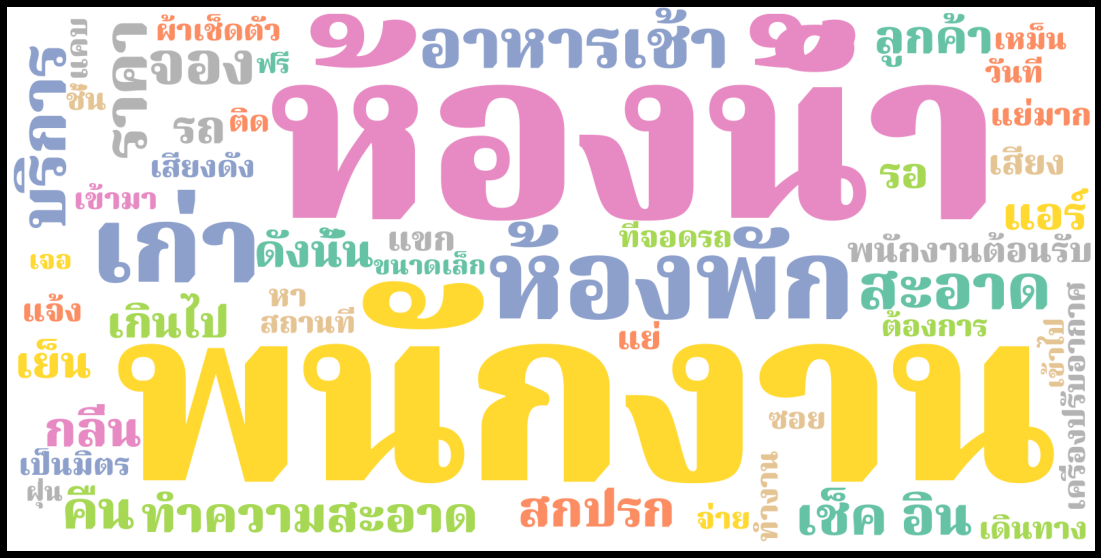

In [344]:
#wordcloud
wordcloud = WordCloud(font_path='NotoSerifThai-Black.ttf' ,stopwords = stopwords, width=1600 , height=800, regexp='[ก-๙a-zA-Z]+', background_color="White" , 
colormap="Set2",  max_words=50).generate(''.join(neg_class['Review_token']))

plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Pos Word Cloud**

In [ ]:
no = ['เดิม','เก่า','แปล','ถนน','ติด','ไม่','นาที','ชัน','ข้อความ','หา','เสียง','เตียง','ข้อ','ซัน','ตัว','แพง','คืน','งาน','ค่ะห้อง']
stopwords.update(no)

In [ ]:
pos_class['Review_token']
pos_class['Review_token'] = pos_class['Review_token'].apply(lambda x: " ".join(x) )

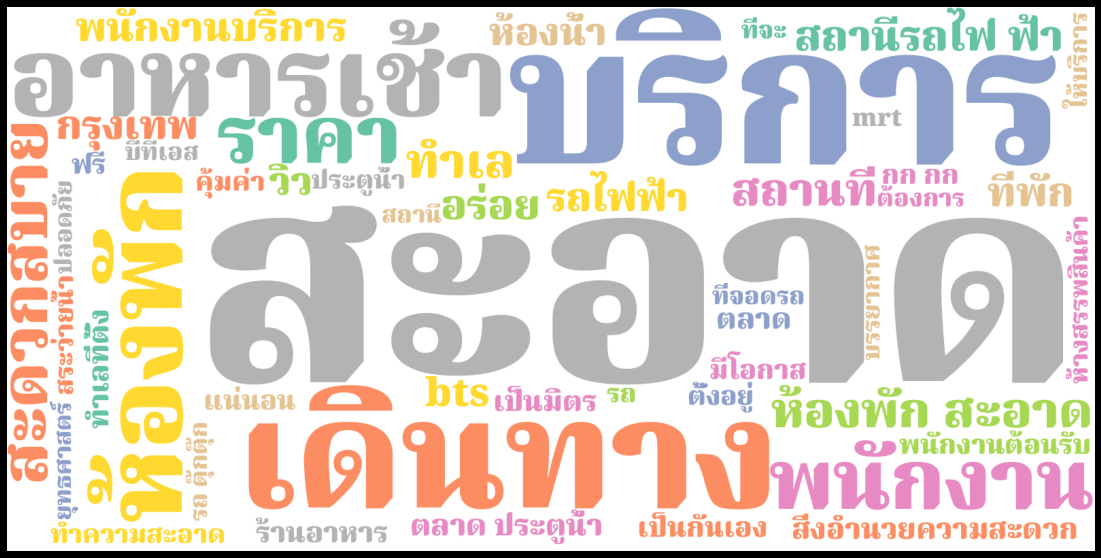

In [ ]:
wordcloud = WordCloud(font_path='NotoSerifThai-Black.ttf' ,stopwords = stopwords, width=1600 , height=800, regexp='[ก-๙a-zA-Z]+', background_color="White" , 
colormap="Set2",  max_words=50).generate(''.join(pos_class['Review_token']))

plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **เก็บไว้ก่อน**

In [ ]:
y_test.value_counts()

In [ ]:
test_predictions = pd.Series(test_predictions)
test_predictions.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,test_predictions)
cm

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, test_predictions), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

**BOW**

In [ ]:
neg_class['Review_token'] = neg_class['Review_token'].apply(lambda x: " ".join(x) )    #neg

In [ ]:
neg_class['Review_token']   #neg

0       น่าเกลียด มาก มาก บริการ เป็น bitchy bitchy ห้...
1               ไม่ ดีมาก ไม่ สะอาด ห้อง ขี้เกียจ พนักงาน
2       จาก การ ขึ้น มา เพื่อ ตรวจสอบ คำพูด ที่ ดีมาก ...
3       แผนกต้อนรับ ส่วนหน้า อาจ มีประโยชน์ มาก แต่ ฉั...
4       สถานที่ ที่ ดี แต่ พนักงาน ที่ ไม่ เป็นมิตร ห้...
                              ...                        
1147    ห้อง สะอาด ทำเล สะดวก ติด รถไฟฟ้า เข้า ห้อง ไป...
1148                     ห้อง เล็ก คับแคบ มาก กก กก กก กก
1149    อาหารเช้า ดี สมราคา ทำเล ดีมาก ห้องน้ำ เล็ก แต...
1150    จอง ไว้ สาม ห้อง เพราะ เช้า ต้อง มี ไป ทำ ธุระ...
1151    น ตามที่ แจ้ง ว่า สามารถ เช็ค อิน ได้ แต่ เมื่...
Name: Review_token, Length: 1152, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(pos_class['Review_token'])

pos_class_bow = cvec.transform(pos_class['Review_token'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(pos_class['Review_token'])

pos_class_bow = cvec.transform(pos_class['Review_token'])

In [ ]:
df_pos_class_features = pd.DataFrame(pos_class_bow.toarray(), columns=cvec.get_feature_names(), index=pos_class['Review_token'])
df_pos_class_features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


a  abang  abf  ac  ai  \
Review_token                                                                   
ใกล้ ตลาด ประตูน้ำ หาก คุณ ต้องการ ซื้อ สินค้า ...  0  0      0    0   0   0   
ตลาด ที่ ดี และ ใกล้ กับ ห้างสรรพสินค้า             0  0      0    0   0   0   
นอนหลับ ได้ดี เพียงแค่ ต้องการ เข้าไป ใน ตรอก แ...  0  0      0    0   0   0   
อาคาร เก่า เพราะ เป็น โรงแรม ระดับ ดาว wifi อยู...  0  0      0    0   0   0   
การ บริการ ที่ ดี ใกล้ กับ ตลาด และ ตลาด ประตูน...  0  0      0    0   0   0   
...                                                .. ..    ...  ...  ..  ..   
เดินทาง สะดวก ปลอดภัย                               0  0      0    0   0   0   
ปลั๊ก น้อย ไป หน่อย นอกนั้น ดีมาก ทำเล ดีมาก        0  0      0    0   0   0   
ทำเล ดีมาก เดิน ขึ้น bts ได้ เลย ราคา ค่อนข้าง ...  0  0      0    0   0   0   
ห้องพัก สะอาด                                       0  0      0    0   0   0   
อีก เดือน เจอกัน นะ ค่ะ                             0  0      0    0   0   0   

                                                    aircond  airport  \
Review_token                                                           
ใกล้ ตลาด ประตูน้ำ หาก คุณ ต้องการ ซื้อ สินค้า ...        0        0   
ตลาด ที่ ดี และ ใกล้ กับ ห้างสรรพสินค้า                   0        0   
นอนหลับ ได้ดี เพียงแค่ ต้องการ เข้าไป ใน ตรอก แ...        0        0   
อาคาร เก่า เพราะ เป็น โรงแรม ระดับ ดาว wifi อยู...        0        0   
การ บริการ ที่ ดี ใกล้ กับ ตลาด และ ตลาด ประตูน...        0        0   
...                                                     ...      ...   
เดินทาง สะดวก ปลอดภัย                                     0        0   
ปลั๊ก น้อย ไป หน่อย นอกนั้น ดีมาก ทำเล ดีมาก              0        0   
ทำเล ดีมาก เดิน ขึ้น bts ได้ เลย ราคา ค่อนข้าง ...        0        0   
ห้องพัก สะอาด                                             0        0   
อีก เดือน เจอกัน นะ ค่ะ                                   0        0   

                                                    airportlink  aja  ...    \
Review_token                                                          ...      
ใกล้ ตลาด ประตูน้ำ หาก คุณ ต้องการ ซื้อ สินค้า ...            0    0  ...  0   
ตลาด ที่ ดี และ ใกล้ กับ ห้างสรรพสินค้า                       0    0  ...  0   
นอนหลับ ได้ดี เพียงแค่ ต้องการ เข้าไป ใน ตรอก แ...            0    0  ...  0   
อาคาร เก่า เพราะ เป็น โรงแรม ระดับ ดาว wifi อยู...            0    0  ...  0   
การ บริการ ที่ ดี ใกล้ กับ ตลาด และ ตลาด ประตูน...            0    0  ...  0   
...                                                         ...  ...  ... ..   
เดินทาง สะดวก ปลอดภัย                                         0    0  ...  0   
ปลั๊ก น้อย ไป หน่อย นอกนั้น ดีมาก ทำเล ดีมาก                  0    0  ...  0   
ทำเล ดีมาก เดิน ขึ้น bts ได้ เลย ราคา ค่อนข้าง ...            0    0  ...  0   
ห้องพัก สะอาด                                                 0    0  ...  0   
อีก เดือน เจอกัน นะ ค่ะ                                       0    0  ...  0   

                                                      ️  ️️️️  ️️️️️️️️️️️  \
Review_token                                                                  
ใกล้ ตลาด ประตูน้ำ หาก คุณ ต้องการ ซื้อ สินค้า ...  0  0     0            0   
ตลาด ที่ ดี และ ใกล้ กับ ห้างสรรพสินค้า             0  0     0            0   
นอนหลับ ได้ดี เพียงแค่ ต้องการ เข้าไป ใน ตรอก แ...  0  0     0            0   
อาคาร เก่า เพราะ เป็น โรงแรม ระดับ ดาว wifi อยู...  0  0     0            0   
การ บริการ ที่ ดี ใกล้ กับ ตลาด และ ตลาด ประตูน...  0  0     0            0   
...                                                .. ..   ...          ...   
เดินทาง สะดวก ปลอดภัย                               0  0     0            0   
ปลั๊ก น้อย ไป หน่อย นอกนั้น ดีมาก ทำเล ดีมาก        0  0     0            0   
ทำเล ดีมาก เดิน ขึ้น bts ได้ เลย ราคา ค่อนข้าง ...  0  0     0            0   
ห้องพัก สะอาด                                       0  0     0            0   
อีก เดือน เจอกัน นะ ค่ะ                             0  0     0            0   

        

In [ ]:
pos_class_array = pos_class_bow.toarray()
pos_class_array[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pos_class['Review_token'] = pos_class['Review_token'].apply(lambda x: " ".join(x) )

In [ ]:
pos_class['Review_token']

0       ใกล้ ตลาด ประตูน้ำ หาก คุณ ต้องการ ซื้อ สินค้า...
1                 ตลาด ที่ ดี และ ใกล้ กับ ห้างสรรพสินค้า
2       นอนหลับ ได้ดี เพียงแค่ ต้องการ เข้าไป ใน ตรอก ...
3       อาคาร เก่า เพราะ เป็น โรงแรม ระดับ ดาว wifi อย...
4       การ บริการ ที่ ดี ใกล้ กับ ตลาด และ ตลาด ประตู...
                              ...                        
2974                                เดินทาง สะดวก ปลอดภัย
2975         ปลั๊ก น้อย ไป หน่อย นอกนั้น ดีมาก ทำเล ดีมาก
2976    ทำเล ดีมาก เดิน ขึ้น bts ได้ เลย ราคา ค่อนข้าง...
2977                                        ห้องพัก สะอาด
2978                              อีก เดือน เจอกัน นะ ค่ะ
Name: Review_token, Length: 2979, dtype: object